Name:-Neha Asole

USN:-CS23011

*ML* Lab-4
AIM:-To build and evalute a Decision Tree model for calssification tasks and study the effect of treedepth and splitt
criteria.
*italicized text*

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/ML_Dataset/daily_weather.csv"
df=pd.read_csv(path)
df.head(5)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
df.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [ ]:
df.isnull().sum()

,0
number,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0


In [ ]:
df.shape

(1095, 11)

In [ ]:
df.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
#Data cleaning:Output "True"-->means that thee are sum null values
df.isnull().any().any()

np.True_

In [ ]:
#print the rows with missing values
df[df.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [ ]:
#we do not need to number the rows as Pandas provide its own indexing
del df["number"]
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.shape

(1095, 10)

In [ ]:
before_rows=df.shape[0]
df = df.dropna()
after_rows = df.shape[0]
print("before rows:",before_rows)
print("after rows:",after_rows)
print("rows dropped:",before_rows-after_rows)

before rows: 1095
after rows: 1064
rows dropped: 31


In [ ]:
df.shape

(1064, 10)

In [ ]:
clean_data=df.copy()
clean_data['high_humdity_label']=(clean_data['relative_humidity_3pm']>24.99)*1
print(clean_data['high_humdity_label'])


0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humdity_label, Length: 1064, dtype: int64


In [ ]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humdity_label'],
      dtype='object')

In [ ]:
del clean_data['relative_humidity_3pm']
del clean_data['relative_humidity_9am']
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'high_humdity_label'],
      dtype='object')

In [ ]:
clean_data.shape

(1064, 9)

In [ ]:
X=clean_data.iloc[:,:-1].values
print(X)

[[918.06        74.822      271.1        ...   2.8632832    0.
    0.        ]
 [917.34768812  71.40384263 101.93517936 ...   3.5333236    0.
    0.        ]
 [923.04        60.638       51.         ...  22.1009672    0.
   20.        ]
 ...
 [916.6         71.096      189.3        ...   3.8922756    0.
    0.        ]
 [912.6         58.406      172.7        ...   4.7646822    0.
    0.        ]
 [921.53        77.702       97.1        ...   4.4515106    0.
    0.        ]]


In [ ]:
y=clean_data.iloc[:,-1].values
print(y)

[1 0 0 ... 1 1 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
X_train

array([[9.15300000e+02, 7.84040000e+01, 1.82800000e+02, ...,
        1.09833754e+01, 2.00000000e-02, 1.70000000e+02],
       [9.17090000e+02, 6.32660000e+01, 1.75500000e+02, ...,
        7.96350640e+00, 0.00000000e+00, 0.00000000e+00],
       [9.15070000e+02, 5.80460000e+01, 1.86200000e+02, ...,
        8.99249880e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.20180000e+02, 6.27440000e+01, 3.26000000e+01, ...,
        3.82516740e+00, 0.00000000e+00, 0.00000000e+00],
       [9.22858110e+02, 6.49893608e+01, 6.34830469e+01, ...,
        1.19492057e+01, 0.00000000e+00, 0.00000000e+00],
       [9.18700000e+02, 6.94220000e+01, 1.61100000e+02, ...,
        1.18557820e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
X_test

array([[918.7      ,  76.226    , 184.6      , ...,   4.7423128,
          0.       ,   0.       ],
       [917.13     ,  80.24     , 183.3      , ...,   2.2593094,
          0.       ,   0.       ],
       [921.09     ,  70.124    , 182.8      , ...,   3.5343652,
          0.       ,   0.       ],
       ...,
       [916.5      ,  74.588    , 101.2      , ...,   2.5948504,
          0.       ,   0.       ],
       [923.6      ,  65.03     ,  62.3      , ...,   8.4108944,
          0.       ,   0.       ],
       [925.28     ,  66.47     ,  49.4      , ...,  15.3454084,
          0.       ,   0.       ]])

In [ ]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)


In [ ]:
X_train

array([[-1.12271037,  1.19919546,  0.56380938, ...,  0.74882022,
        -0.1110189 , -0.07898878],
       [-0.5564238 , -0.18204988,  0.45875942, ...,  0.20133281,
        -0.12242661, -0.18801274],
       [-1.19547345, -0.65834138,  0.61273676, ...,  0.38788407,
        -0.12242661, -0.18801274],
       ...,
       [ 0.42113234, -0.22967903, -1.59762952, ..., -0.54892772,
        -0.12242661, -0.18801274],
       [ 1.26838251, -0.02480427, -1.15320995, ...,  0.9239205 ,
        -0.12242661, -0.18801274],
       [-0.04708225,  0.37964561,  0.25153758, ..., -1.02747227,
        -0.12242661, -0.18801274]])

In [ ]:
#Fit the model on the tarining set using the decision tree classifier
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

[Text(0.39285714285714285, 0.9166666666666666, 'x[0] <= 919.175\ngini = 0.5\nsamples = 744\nvalue = [370, 374]'),
 Text(0.21428571428571427, 0.75, 'x[1] <= 72.34\ngini = 0.404\nsamples = 391\nvalue = [110, 281]'),
 Text(0.30357142857142855, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[2] <= 67.45\ngini = 0.201\nsamples = 230\nvalue = [26, 204]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.21428571428571427, 0.4166666666666667, 'gini = 0.127\nsamples = 205\nvalue = [14.0, 191.0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.499\nsamples = 161\nvalue = [84, 77]'),
 Text(0.5714285714285714, 0.75, 'x[1] <= 55.571\ngini = 0.388\nsamples = 353\nvalue = [260, 93]'),
 Text(0.4821428571428571, 0.8333333333333333, '  False'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[2] <= 54.212\ngini = 0.451\nsamples = 64\nvalue = [22, 42]'),
 Text(0.35714285714285715, 0.4166666666666667, 'x[3]

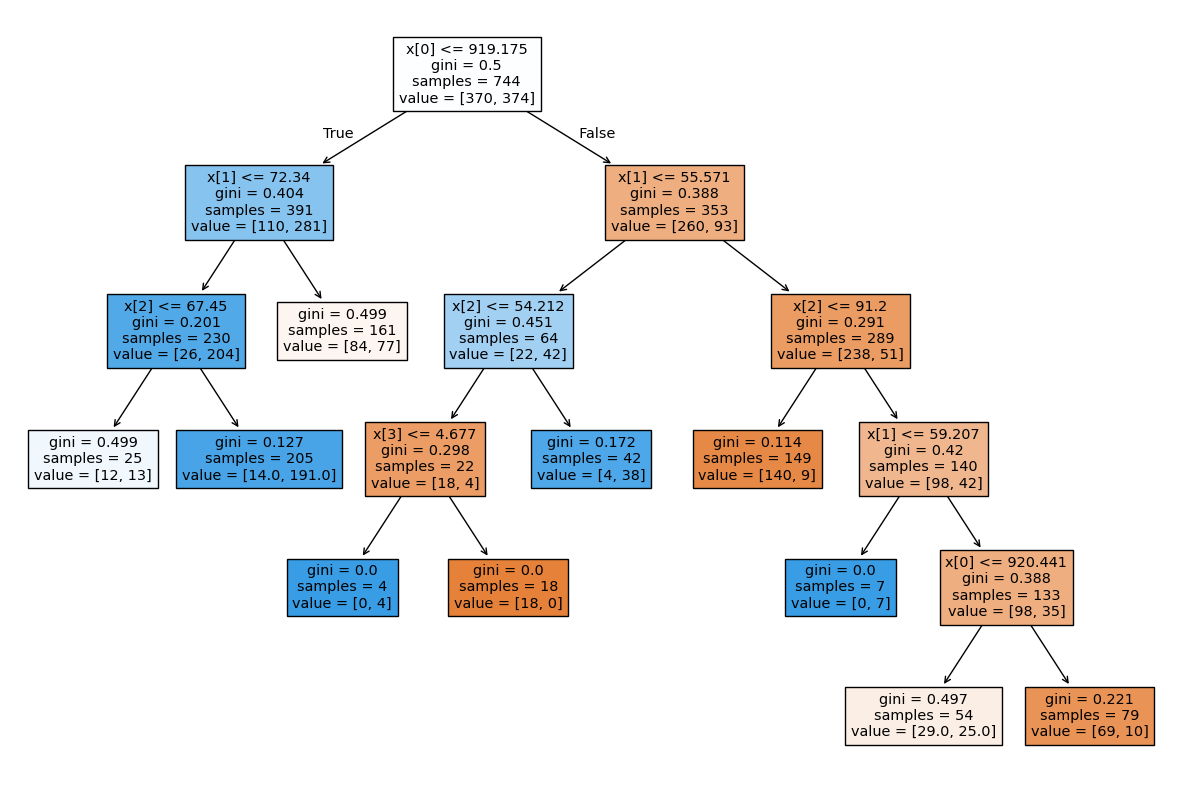

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(humidity_classifier,filled=True)

In [ ]:
y_pred=humidity_classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[138  27]
 [ 52 103]]


In [ ]:
accuracy=accuracy_score(y_pred,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       165
           1       0.79      0.66      0.72       155

    accuracy                           0.75       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320

